<a href="https://colab.research.google.com/github/alshubati99/Data-Science-Study/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression
- logistic regression can predict values that are restricted to the (0,1) interval => such as probabiites when the response variable is categorical in nature.
- Logistic regression is applied when response variable has two possible values ony. (it is a `binary classifier`)

- Linear regression = compute profit as function of investment.
- Logistic resgresion = decide wether the investment will be profitable or not(2 possibilites)
- The `sigmoid` function is used to transform the model scores in x-variable into probatilities in interval[0,1].
- *odds* => ratio p/(1-p)
-

### Affairs Dataset

In [1]:
import statsmodels.api as sm
df = sm.datasets.fair.load_pandas().data
df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000


In [3]:
# replace affairs variable by binary value: 0 represents no extramarital affair, 1 shows some affar
df['affairs'] = (df.affairs>0).astype(int)
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


<BarContainer object of 2 artists>

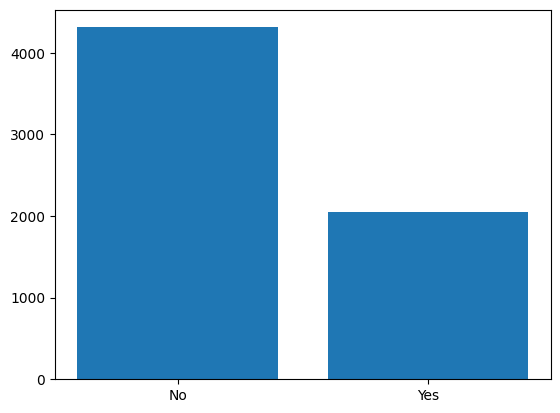

In [4]:
import matplotlib.pyplot as plt
data = [df[df['affairs']==0].shape[0], df[df['affairs']==1].shape[0]]
labels = ['No','Yes']
plt.bar(labels,data)

<Axes: xlabel='affairs', ylabel='count'>

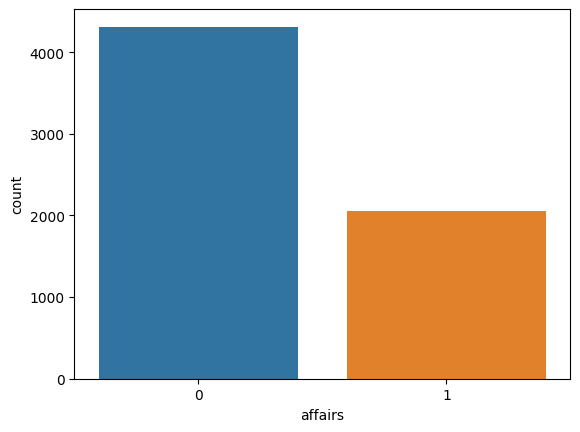

In [5]:
import seaborn as sns
sns.countplot(x=df.affairs)

<Axes: xlabel='age', ylabel='Count'>

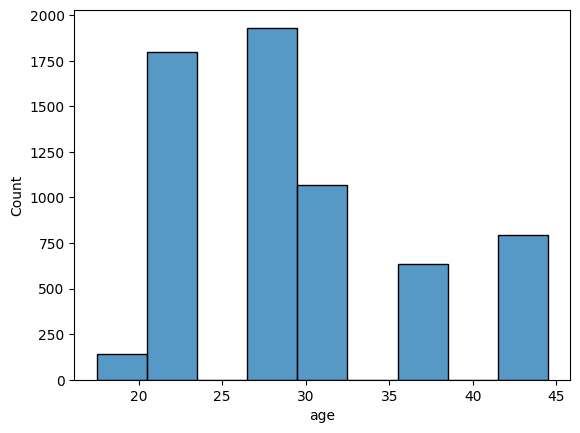

In [6]:
sns.histplot(data = df,x='age',binwidth = 3)

In [7]:
df.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,1.000000


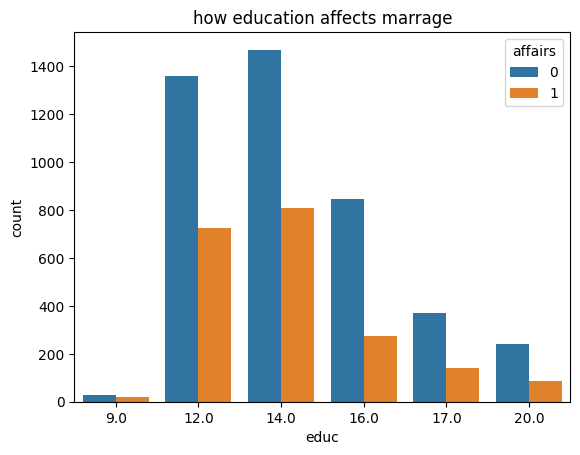

In [9]:
sns.countplot(x='educ', hue='affairs', data=df)
plt.title('how education affects marrage')
plt.show()

Text(0, 0.5, 'percentage of cheating')

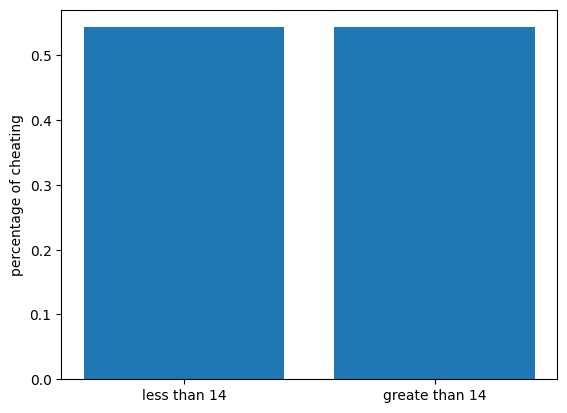

In [10]:
ratio_1 = df[(df['affairs']==1)&(df['educ']<=14.0)].shape[0]/df[(df['affairs']==0)&(df['educ']<=14.0)].shape[0]
ratio_2 = df[(df['affairs']==1)&(df['educ']<=14.0)].shape[0]/df[(df['affairs']==0)&(df['educ']<=14.0)].shape[0]
ratio = [ratio_1,ratio_2]
labels = ['less than 14','greate than 14']
plt.bar(labels,ratio)
plt.ylabel('percentage of cheating')

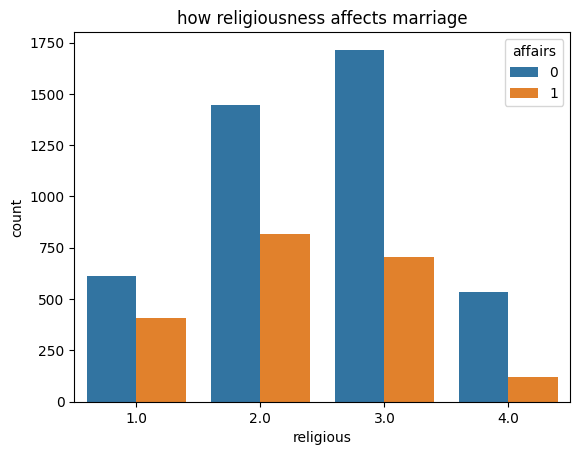

In [11]:
sns.countplot(x='religious',hue='affairs',data=df)
plt.title('how religiousness affects marriage')
plt.show()

<Axes: xlabel='rate_marriage', ylabel='count'>

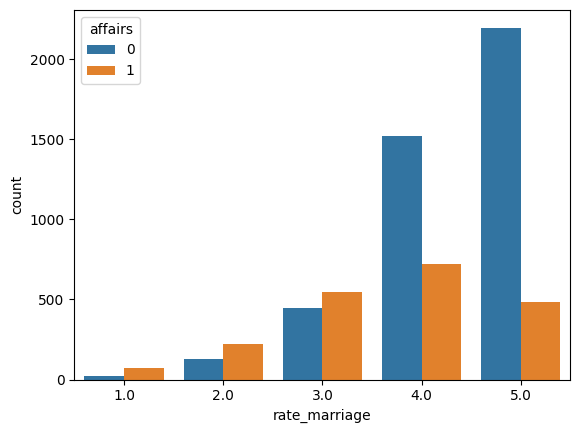

In [13]:
sns.countplot(x = 'rate_marriage',hue='affairs', data = df)
plt.show()

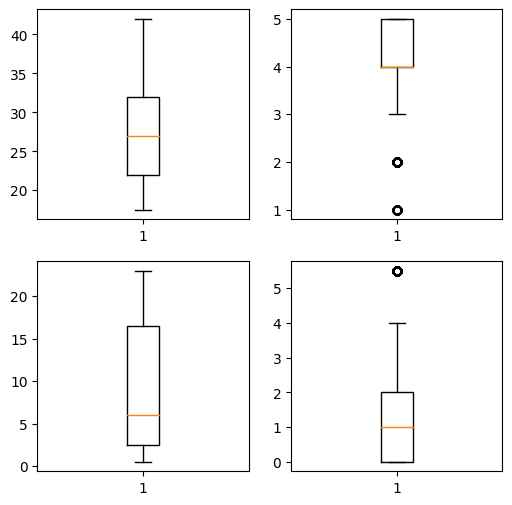

In [14]:
fig,ax = plt.subplots(2,2,figsize=(6,6))
ax[0,0].boxplot(df.age)
ax[0,1].boxplot(df.rate_marriage)
ax[1,0].boxplot(df.yrs_married)
ax[1,1].boxplot(df.children)
plt.show()


<Axes: >

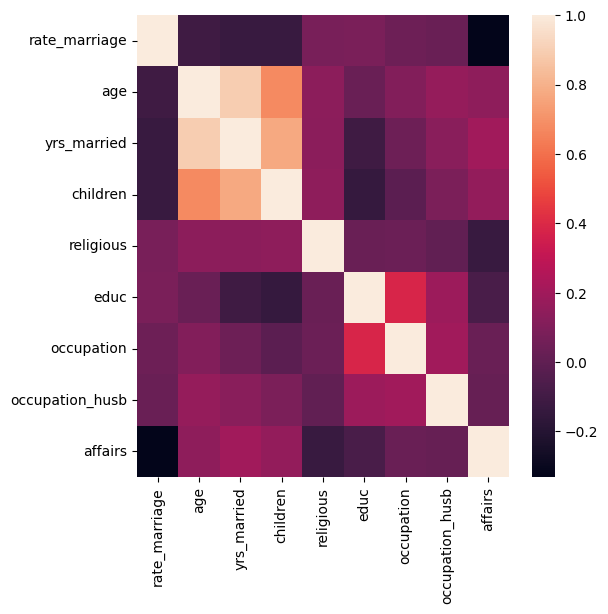

In [15]:
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(df.corr())

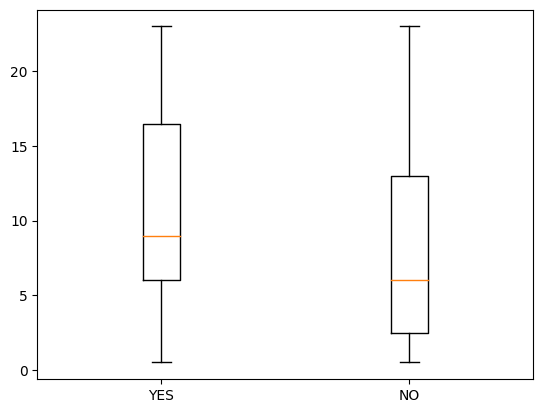

In [16]:
dfYES = df[df['affairs']==1]
dfNO = df[df['affairs']==0]
fig, ax = plt.subplots()
ax.boxplot([dfYES.yrs_married, dfNO.yrs_married])
plt.xticks([1,2],['YES','NO'])
plt.show()

### Logistic Regression Model

In [17]:
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm

y,X = dmatrices('affairs ~ rate_marriage + age + yrs_married + children + religious + educ+\
occupation+occupation_husb', data=df, return_type  = 'dataframe')

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

model = sm.Logit(y_train,x_train)
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.547937
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                affairs   No. Observations:                 5092
Model:                          Logit   Df Residuals:                     5083
Method:                           MLE   Df Model:                            8
Date:                Fri, 24 Nov 2023   Pseudo R-squ.:                  0.1303
Time:                        02:01:54   Log-Likelihood:                -2790.1
converged:                       True   LL-Null:                       -3208.1
Covariance Type:            nonrobust   LLR p-value:                3.697e-175
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.5724      0.331     10.794      0.000       2.924       4.221
rate_marriage 

- from the p-values for the regression coefficients, it is noticed that (children, occupation_husb) may not make a significant contribution to the equation.
- try generate a new model without them, and test wether this reduced model fits the data as well


In [18]:
# dropping children
y,X = dmatrices('affairs ~ rate_marriage + age + yrs_married  + religious + educ+\
occupation+occupation_husb', data=df, return_type  = 'dataframe')

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

model = sm.Logit(y_train,x_train)
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.547967
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                affairs   No. Observations:                 5092
Model:                          Logit   Df Residuals:                     5084
Method:                           MLE   Df Model:                            7
Date:                Fri, 24 Nov 2023   Pseudo R-squ.:                  0.1302
Time:                        02:05:28   Log-Likelihood:                -2790.2
converged:                       True   LL-Null:                       -3208.1
Covariance Type:            nonrobust   LLR p-value:                3.798e-176
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.5548      0.329     10.794      0.000       2.909       4.200
rate_marriage 

In [19]:
# drop occupation_busb
# dropping children
y,X = dmatrices('affairs ~ rate_marriage + age + yrs_married  + religious + educ+\
occupation', data=df, return_type  = 'dataframe')

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

model = sm.Logit(y_train,x_train)
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.548002
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                affairs   No. Observations:                 5092
Model:                          Logit   Df Residuals:                     5085
Method:                           MLE   Df Model:                            6
Date:                Fri, 24 Nov 2023   Pseudo R-squ.:                  0.1302
Time:                        02:06:37   Log-Likelihood:                -2790.4
converged:                       True   LL-Null:                       -3208.1
Covariance Type:            nonrobust   LLR p-value:                3.673e-177
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.5722      0.328     10.889      0.000       2.929       4.215
rate_marriage    -0.

### Final Model: predicting labels


In [20]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


y,X = dmatrices('affairs ~ rate_marriage + age + yrs_married  + religious + educ+\
occupation', data=df, return_type  = 'dataframe')

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print('Accuracy : {:.25}'.format(model.score(x_test, y_test)))

Accuracy : 0.7315541601255887149690693


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(50.722222222222214, 0.5, 'actual label')

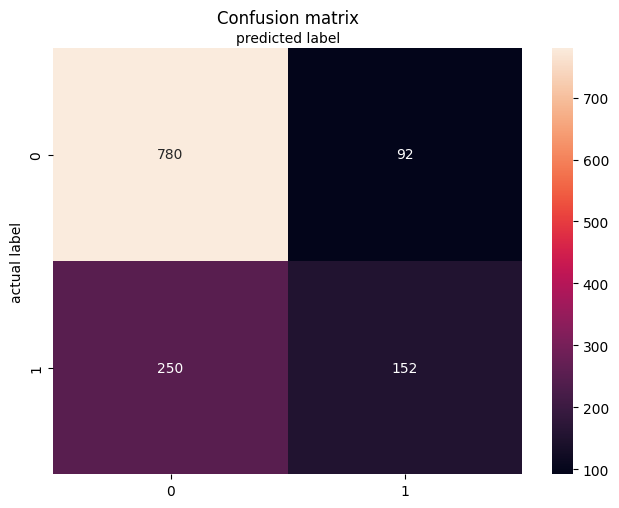

In [23]:
from sklearn.metrics import confusion_matrix
import pandas as pd
confusion_matrix = confusion_matrix(y_test, y_pred)
#create heatmap
ax = sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix')
plt.xlabel('predicted label')
plt.ylabel('actual label')

### Evaluation using metrics


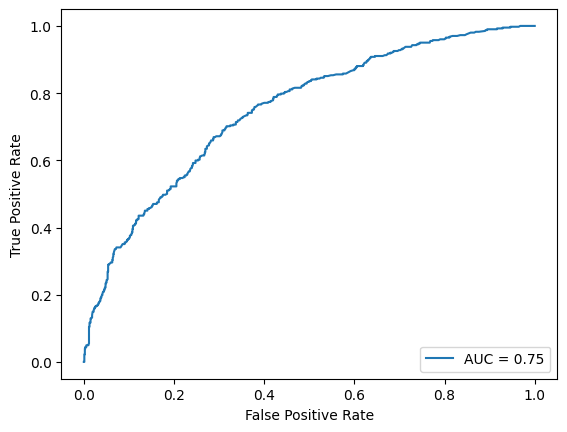

In [24]:
y_pred = model.predict_proba(x_test)[:,1]
fpr, tpr, threshholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc)
display.plot()
plt.show()

### Understanding Models

In [26]:
from sklearn import datasets
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data,columns=iris.feature_names)
df['target']=iris.target
df.head()
#setosa(target=0)
# versicolor(target = 1)
# virginica(target = 2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Evaluating the LR Model

In [27]:
# modify second class as one to discriminate Setosa from the others
df.loc[df['target']==2,'target']=1
y=df.target
X=df.drop('target',axis = 1)

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

model = LogisticRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)
print('accuracy = : {:.2f}'.format(model.score(x_test,y_test)))
print(model.coef_)
print(model.intercept_)

y_pred = model.predict_proba(x_test)
print(y_pred[0])
print(x_test.iloc[0,:])

accuracy = : 1.00
[[ 0.46563981 -0.76202081  2.18199858  0.88510408]]
[-6.82274283]
[0.98756462 0.01243538]
sepal length (cm)    5.8
sepal width (cm)     4.0
petal length (cm)    1.2
petal width (cm)     0.2
Name: 14, dtype: float64


In [28]:
from sklearn import datasets
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data,columns=iris.feature_names)
df['target']=iris.target
df.loc[df['target']==2,'target']=1
y=df.target

df=df.drop('petal length (cm)', axis = 1)
df=df.drop('petal width (cm)', axis = 1)
df=df.drop('target', axis = 1)
print(df)

     sepal length (cm)  sepal width (cm)
0                  5.1               3.5
1                  4.9               3.0
2                  4.7               3.2
3                  4.6               3.1
4                  5.0               3.6
..                 ...               ...
145                6.7               3.0
146                6.3               2.5
147                6.5               3.0
148                6.2               3.4
149                5.9               3.0

[150 rows x 2 columns]


In [29]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

model = LogisticRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)
print('accuracy = : {:.2f}'.format(model.score(x_test,y_test)))
print(model.coef_)
print(model.intercept_)

y_pred = model.predict_proba(x_test)
print('\n===> fist test sample')
print(x_test.iloc[0,:])
print('\n===> prediction for fist test sample')
print(y_pred[0])



accuracy = : 1.00
[[ 0.46563981 -0.76202081  2.18199858  0.88510408]]
[-6.82274283]

===> fist test sample
sepal length (cm)    5.8
sepal width (cm)     4.0
petal length (cm)    1.2
petal width (cm)     0.2
Name: 14, dtype: float64

===> prediction for fist test sample
[0.98756462 0.01243538]


In [31]:
import math
print('\n===> CHECK!')
score = model.intercept_[0] + model.coef_[0,0]*x_test.iloc[0,0]+\
model.coef_[0,1]*x_test.iloc[0,1]

print('Score = {:.4f}'.format(score))

print('\n==> probaility that it is from class 1')
proba = math.exp(score)/(1+math.exp(score))
print('Probability = {:.4f}'.format(proba))


===> CHECK!
Score = -7.1701

==> probaility that it is from class 1
Probability = 0.0008


# Computing the Decision Boundry

In [32]:
from sklearn import datasets
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data,columns=iris.feature_names)
df['target']=iris.target
df.loc[df['target']==2,'target']=1
y=df.target

Setosa = df[df.target ==0]
others = df[df.target ==1]

df=df.drop('petal length (cm)', axis = 1)
df=df.drop('petal width (cm)', axis = 1)
df=df.drop('target', axis = 1)
print(df)

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

model = LogisticRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)
print('accuracy = : {:.2f}'.format(model.score(x_test,y_test)))

     sepal length (cm)  sepal width (cm)
0                  5.1               3.5
1                  4.9               3.0
2                  4.7               3.2
3                  4.6               3.1
4                  5.0               3.6
..                 ...               ...
145                6.7               3.0
146                6.3               2.5
147                6.5               3.0
148                6.2               3.4
149                5.9               3.0

[150 rows x 2 columns]
accuracy = : 1.00


### Plotting the Decision Boundary

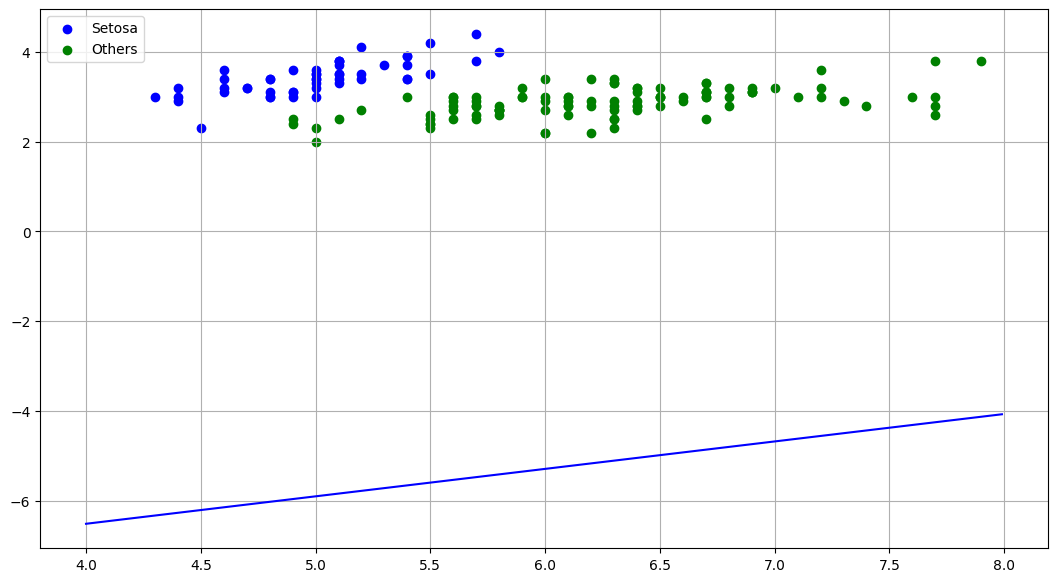

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(13,7) # adjusting length and width of the plot

# labels and scatter points
ax.scatter(Setosa['sepal length (cm)'],Setosa['sepal width (cm)'], label = 'Setosa', facecolor = 'blue')
ax.scatter(others['sepal length (cm)'],others['sepal width (cm)'], label = 'Others', facecolor = 'green')
plt.legend()
xList = np.arange(4,8,0.01)

#the boundry line
#model.intercept_[0] + model.coef_[0,0]*x_test.iloc[0,0]+\
#model.coef_[0,1]*x_test.iloc[0,1]=0

V_vals = [model.intercept_[0]+model.coef_[0,0]*x for x in xList]
V_vals = V_vals/-model.coef_[0,1]

# plot best fit line over the acutal values
plt.plot(xList, V_vals, 'b')
plt.grid()
plt.show()

### Evaluate A Model Using Single Variable

In [36]:
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data,columns=iris.feature_names)
df['target']=iris.target
df.loc[df['target']==2,'target']=1
y=df.target

Setosa = df[df.target ==0]
others = df[df.target ==1]


df=df.drop(['petal length (cm)', 'petal width (cm)','sepal width (cm)', 'target'], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

model = LogisticRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)
print('accuracy = : {:.2f}'.format(model.score(x_test,y_test)))

accuracy = : 1.00


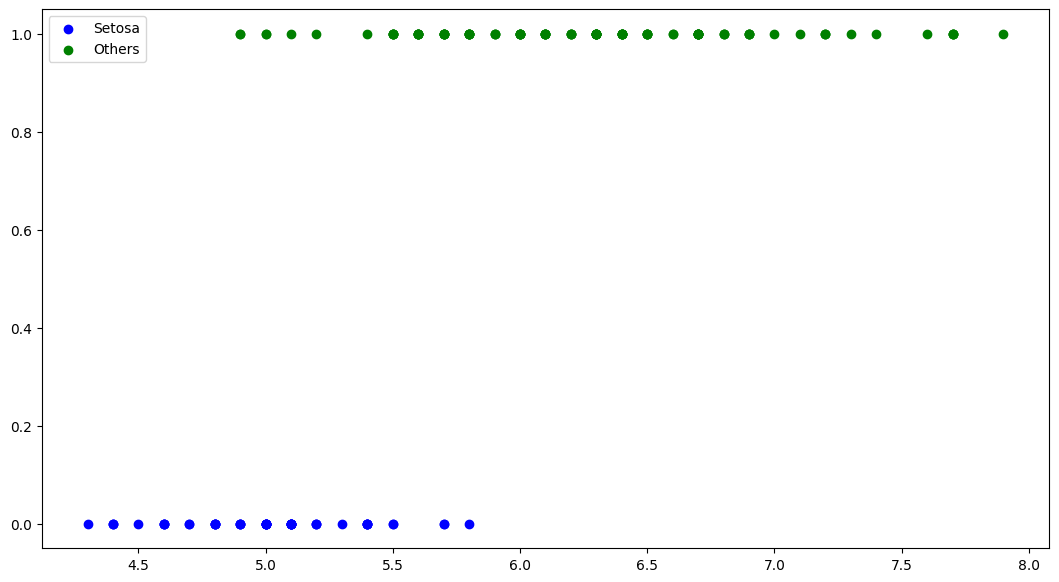

In [37]:
fig, ax = plt.subplots()
fig.set_size_inches(13,7) # adjusting length and width of the plot

# labels and scatter points
ax.scatter(Setosa['sepal length (cm)'],np.zeros(50), label = 'Setosa', facecolor = 'blue')
ax.scatter(others['sepal length (cm)'],np.ones(100), label = 'Others', facecolor = 'green')
plt.legend()
xList = np.arange(4,8,0.01)

# Sigmoid Function
def sigFunc(x):
  return 1/(1+np.exp(-x))


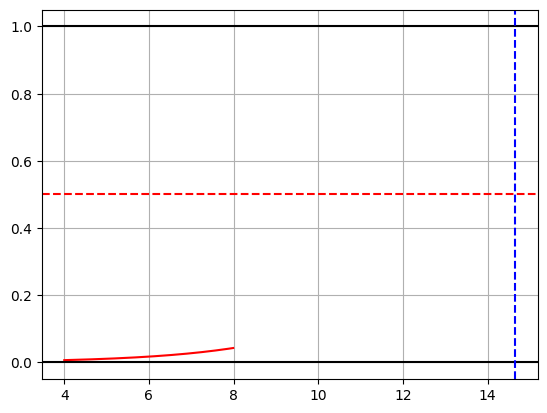

In [38]:

V_vals = np.array([model.intercept_[0]+model.coef_[0,0]* xList])
V_vals = sigFunc(V_vals).ravel()

# plot best fit line over the acutal values
plt.plot(xList, V_vals, 'r')
plt.axhline(y=0, color = 'k', linestyle='-')
plt.axhline(y=1, color = 'k', linestyle='-')
plt.axhline(y=0.5, color = 'r', linestyle='--')
plt.axvline(x=-model.intercept_[0]/model.coef_[0,0], color = 'b',linestyle='--')

plt.grid()
plt.show()